In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Data Processing

### Open Data


In [106]:
data = pd.read_csv('./dataset/train.csv')
data.head()



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Describe

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [76]:
# Check for missing and duplicated values
print(data.isnull().sum())
print(data.duplicated().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
0


#### - This dataset contains information from 2000 mobile phones.
#### - We have 21 variables including 20 independent variables and 1 dependent variable which is price_range.
#### - There is no missing value in the dataset.
#### - We have 8 categorical variables: n_cores , price_range, blue, dual_sim, four_g, three_g, touch_screen, wifi
#### - We have 13 numeric variables: battery_power, clock_speed, fc, int_memory, m_dep, mobile_wt, pc, px_height, px_width, ram, talk_time, sc_h, sc_w


### Statistical Description of Categorical Variables

In [112]:
# Filter out categorical features
data_categorical = data[['price_range', 'n_cores', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']].astype(str)

# Calculate number of unique values and unique values for each feature
unique_counts = data_categorical.nunique()
unique_values = data_categorical.apply(lambda x: x.unique())

# Create new dataframe with the results
pd.DataFrame({'Number of Unique Values': unique_counts, 'Unique Values': unique_values})

,Number of Unique Values,Unique Values
price_range,4,"[1, 2, 3, 0]"
n_cores,8,"[2, 3, 5, 6, 1, 8, 4, 7]"
blue,2,"[0, 1]"
dual_sim,2,"[0, 1]"
four_g,2,"[0, 1]"
three_g,2,"[0, 1]"
touch_screen,2,"[0, 1]"
wifi,2,"[1, 0]"


### Statistical Description of Numerical Variables

In [113]:
# Filter out numerical features
data_numerical = data.drop(data_categorical.columns, axis=1)
# Generate descriptive statistics
data_numerical.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.5,439.4,501.0,851.8,1226.0,1615.2,1998.0
clock_speed,2000.0,1.5,0.8,0.5,0.7,1.5,2.2,3.0
fc,2000.0,4.3,4.3,0.0,1.0,3.0,7.0,19.0
int_memory,2000.0,32.0,18.1,2.0,16.0,32.0,48.0,64.0
m_dep,2000.0,0.5,0.3,0.1,0.2,0.5,0.8,1.0
mobile_wt,2000.0,140.2,35.4,80.0,109.0,141.0,170.0,200.0
pc,2000.0,9.9,6.1,0.0,5.0,10.0,15.0,20.0
px_height,2000.0,645.1,443.8,0.0,282.8,564.0,947.2,1960.0
px_width,2000.0,1251.5,432.2,500.0,874.8,1247.0,1633.0,1998.0
ram,2000.0,2124.2,1084.7,256.0,1207.5,2146.5,3064.5,3998.0


### Visualization

(2000, 21)

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

<Axes: xlabel='price_range', ylabel='count'>

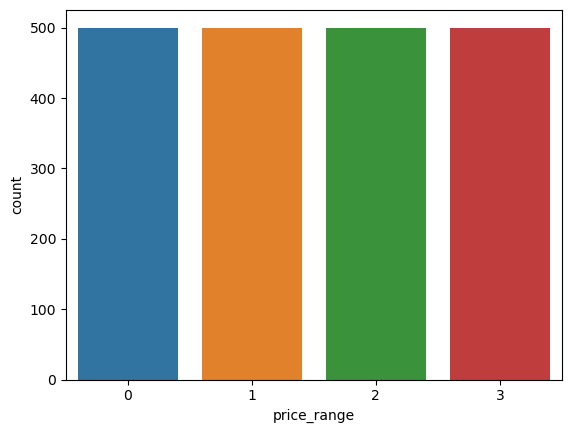

In [104]:
display(data.shape)
display(data["price_range"].value_counts())
sns.countplot(x='price_range', data=data)

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


<Figure size 1000x400 with 0 Axes>

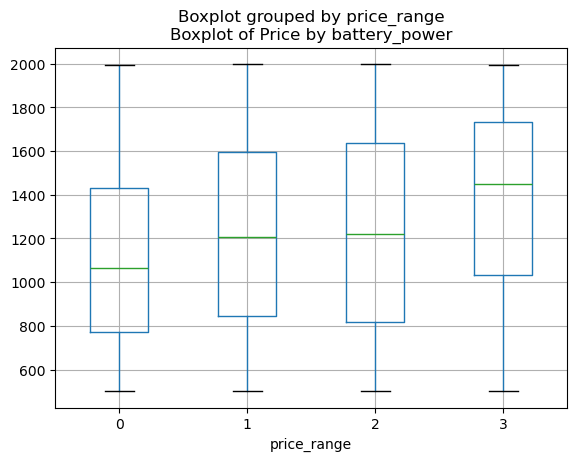

<Figure size 1000x400 with 0 Axes>

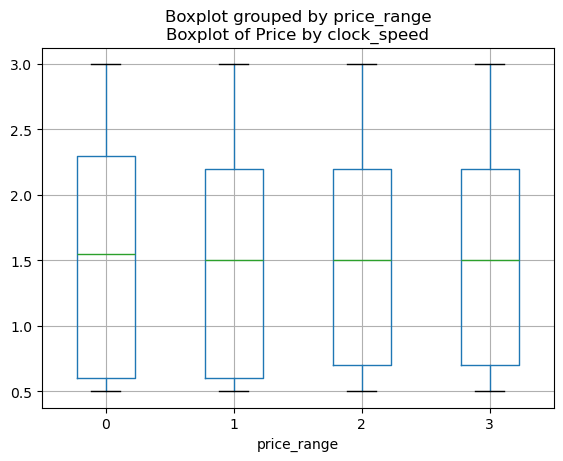

<Figure size 1000x400 with 0 Axes>

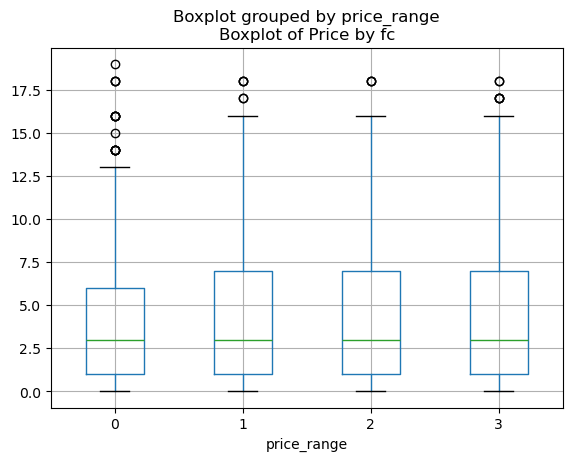

<Figure size 1000x400 with 0 Axes>

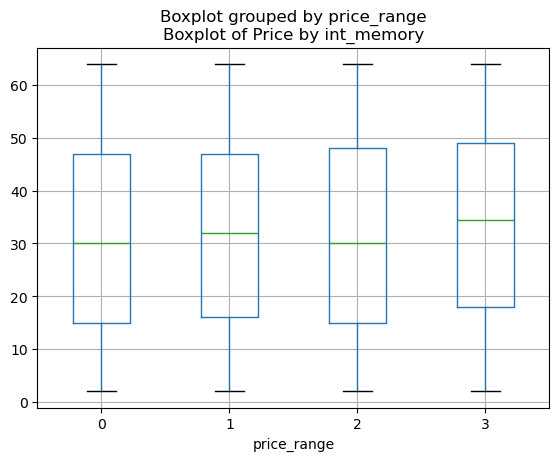

<Figure size 1000x400 with 0 Axes>

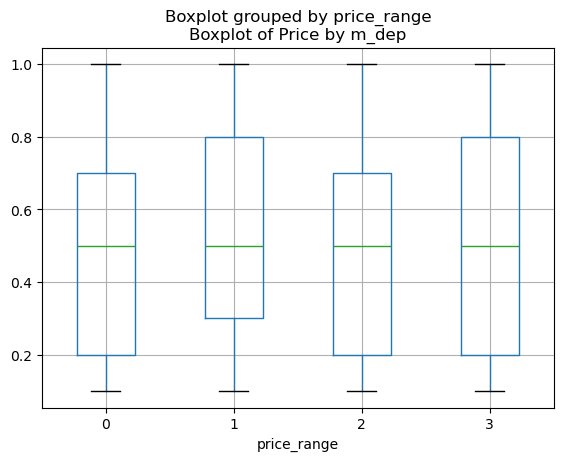

<Figure size 1000x400 with 0 Axes>

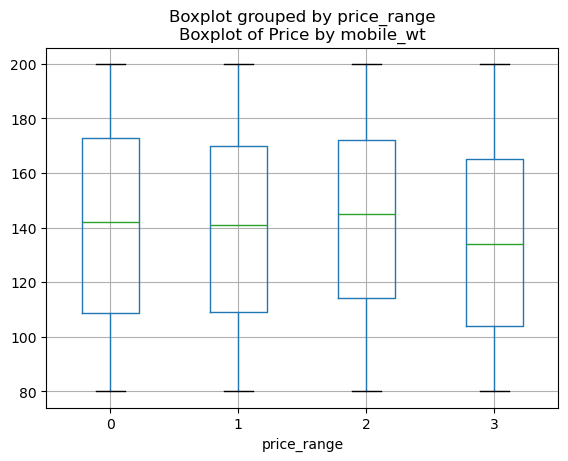

<Figure size 1000x400 with 0 Axes>

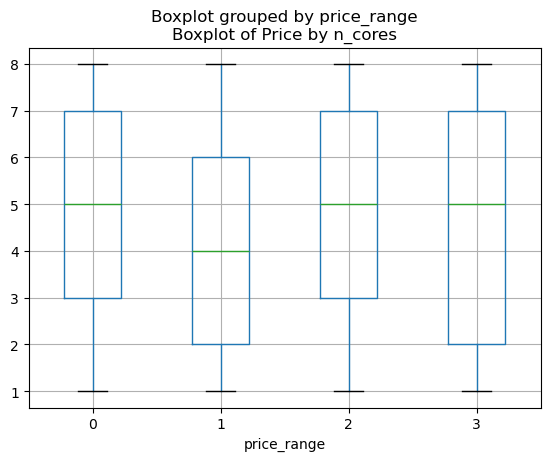

<Figure size 1000x400 with 0 Axes>

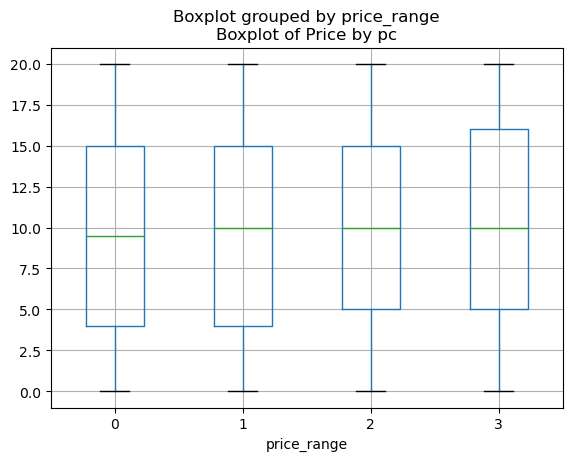

<Figure size 1000x400 with 0 Axes>

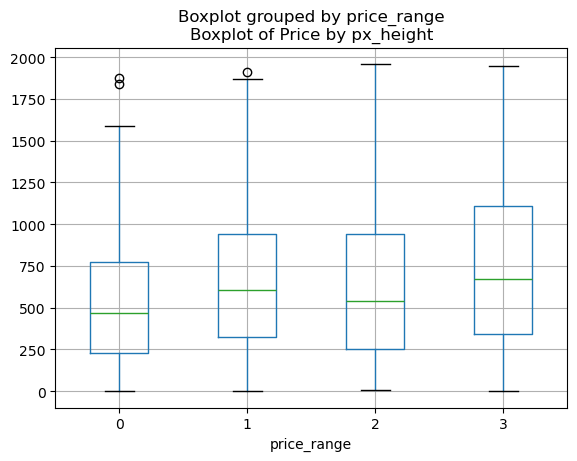

<Figure size 1000x400 with 0 Axes>

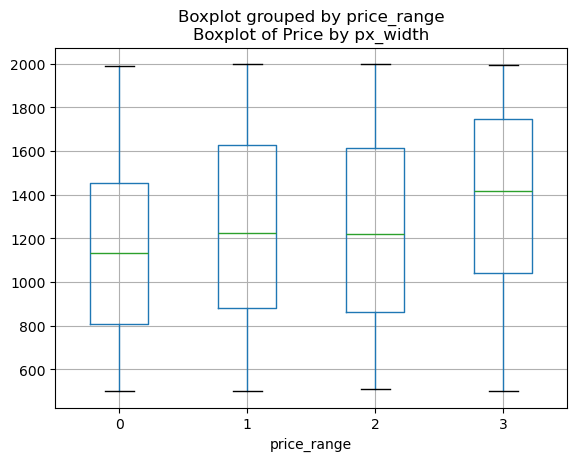

<Figure size 1000x400 with 0 Axes>

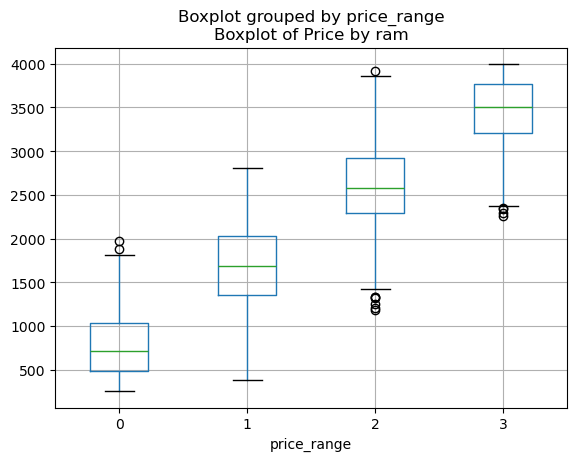

<Figure size 1000x400 with 0 Axes>

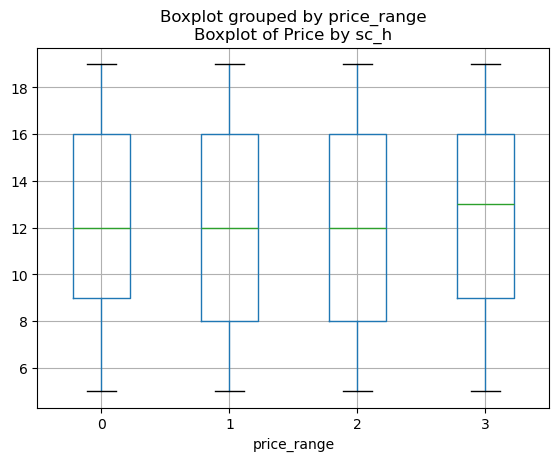

<Figure size 1000x400 with 0 Axes>

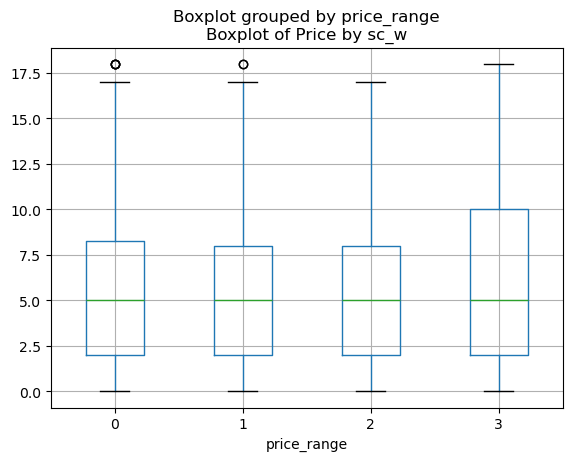

<Figure size 1000x400 with 0 Axes>

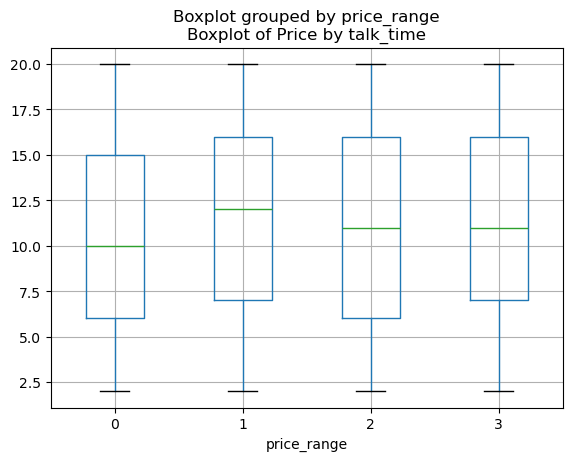

In [89]:
# Exploratory Data Analysis 
binary_features = [col for col in data.columns if data[col].nunique() == 2]
numeric_features = [col for col in data.select_dtypes(include=[np.number]).columns if col not in binary_features and col != 'price_range']
print(binary_features)
print(numeric_features)
for column in data[numeric_features]:
    if column != 'price_range':
        plt.figure(figsize=(10, 4))
        data.boxplot(column=column, by='price_range')
        plt.title(f'Boxplot of Price by {column}')
        plt.show()

Handle Missing values

Pre-processing

# Models


## Pine line 1: StandardScaler(with_mean=True, with_std=True) -> PCA (with n_components=4) - > Support Vector Classifier (SVC) using K-Fold

In [90]:
# Normalization
# Should be scaled: battery_power, ram, px_width, px_ height, pc, n_cores, mobile_wt, int_memory, fc
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[numeric_features] = scaler.fit_transform(data_scaled[numeric_features])
display("Original Dataset:",data.head(10))
display("Scaled Dataset: ",data_scaled.head(10))


'Original Dataset:'

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


'Scaled Dataset: '

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,0,0.830779,0,-0.762495,0,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,0,0,1,1
1,-0.495139,1,-1.253064,1,-0.992890,1,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,1,1,0,2
2,-1.537686,1,-1.253064,1,-0.532099,1,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,1,1,0,2
3,-1.419319,1,1.198517,0,-0.992890,0,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,1,0,0,2
4,1.325906,1,-0.395011,0,2.002254,1,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,1,1,0,1
5,1.412405,0,-1.253064,1,-0.301703,0,-0.553795,0.687548,0.671107,-1.539175,...,0.808917,0.931480,-0.974874,1.114266,-1.094526,-0.185077,1,0,0,1
6,1.325906,0,0.217884,0,-0.071307,1,-1.215274,1.034357,-0.035292,1.521249,...,-0.595280,-0.540431,1.010444,0.164641,0.512708,1.279430,1,0,1,3
7,1.628654,0,-1.253064,1,-0.992890,0,-0.443549,1.034357,1.320993,-0.227564,...,-0.300016,-0.237254,-1.313291,0.876859,-0.635317,-1.100394,1,1,1,0
8,0.470015,1,-1.253064,0,-0.992890,0,1.155024,0.687548,0.953666,1.084046,...,-0.584011,-0.961638,-0.945367,1.114266,-1.094526,1.645557,1,0,0,0
9,-1.660607,1,-1.130485,1,-0.532099,1,-1.270397,-1.393304,-1.335064,0.209639,...,1.108689,-0.063680,-1.485727,1.589078,0.971917,0.181050,1,0,0,0


# Metrics

# Evaluations